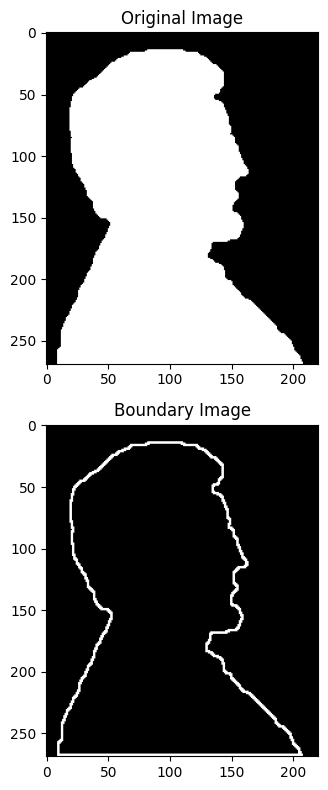

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def perform_erosion(image, structuring_element_size):
    row, cols = image.shape
    kernel = np.ones((structuring_element_size, structuring_element_size), np.uint8)
    eroded_image = np.zeros(image.shape)

    for i in range(structuring_element_size//2, row-structuring_element_size//2):
        for j in range(structuring_element_size//2, cols-structuring_element_size//2):
            region = image[i-structuring_element_size//2:i+structuring_element_size//2+1,
                     j-structuring_element_size//2:j+structuring_element_size//2+1]
            eroded_image[i, j] = np.min(region*kernel)

    return eroded_image

def boundary_extraction(image, structuring_element_size):
    boundary_image = image - perform_erosion(image, structuring_element_size)
    return boundary_image


original_image = cv2.imread('licoln.tif', cv2.IMREAD_GRAYSCALE)
structuring_element_size = 5
boundary_image = boundary_extraction(original_image, structuring_element_size)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 1, 2)
plt.imshow(boundary_image, cmap='gray')
plt.title('Boundary Image')

plt.tight_layout()
plt.show()
